<a href="https://colab.research.google.com/github/JRONC/Proyecto2025-bioinform/blob/main/2_secuen_exon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!cd /content/drive/MyDrive/Colab_Notebooks/gen_evol/datasets

!pip install biopython
from Bio import Entrez, SeqIO
Entrez.email = "jhomageme@gmail.com"
accession = "NM_000506.5" # trombina Homo sapiens


# Usamos Entrez para obtener la secuencia en formato FASTA
handle = Entrez.efetch(db="nucleotide", id=accession, rettype="fasta", retmode="text")
record = SeqIO.read(handle, "fasta")
handle.close()

# Guardamos la secuencia en un archivo FASTA local
SeqIO.write(record, "/content/drive/MyDrive/Colab Notebooks/mi_secuencia.fasta", "fasta")

# Mostramos información básica de la secuencia
print("ID:", record.id)
print("Descripción:", record.description)
print("Longitud:", len(record.seq))
print("Primeros 101 nucleótidos:", record.seq[:101])

/bin/bash: line 1: cd: /content/drive/MyDrive/Colab_Notebooks/gen_evol/datasets: No such file or directory
ID: NM_000506.5
Descripción: NM_000506.5 Homo sapiens coagulation factor II, thrombin (F2), mRNA
Longitud: 1990
Primeros 101 nucleótidos: AGTGACCCAGGAGCTGACACACTATGGCGCACGTCCGAGGCTTGCAGCTGCCTGGCTGCCTGGCCCTGGCTGCCCTGTGTAGCCTTGTGCACAGCCAGCAT


In [5]:
from Bio.Seq import Seq
# Leemos la secuencia guardada en el archivo FASTA
registro = SeqIO.read("/content/drive/MyDrive/Colab Notebooks/mi_secuencia.fasta", "fasta")

# Convertimos la secuencia (string) a una lista de caracteres para poder editarla
seq_list = list(str(registro.seq))

# Realizamos una mutación en la posición 100 (cambiamos el nucleótido por 'A')
seq_list[100] = "A"

# Reconstruimos la secuencia de caracteres a una cadena de texto (string) como objeto Seq
secuencia_mutada = Seq("".join(seq_list))

# Mostramos los primeros 101 nucleótidos de la secuencia mutada
print("Secuencia mutada (primeros 101 nt):", secuencia_mutada[:101])

Secuencia mutada (primeros 101 nt): AGTGACCCAGGAGCTGACACACTATGGCGCACGTCCGAGGCTTGCAGCTGCCTGGCTGCCTGGCCCTGGCTGCCCTGTGTAGCCTTGTGCACAGCCAGCAA


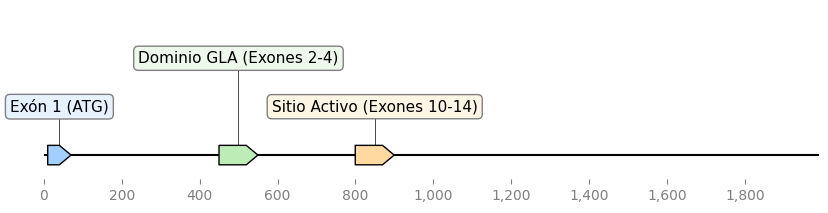

In [8]:
# Instalamos la librería para visualizar secuencias con anotaciones
!pip install dna_features_viewer

# Importamos los módulos necesarios
from dna_features_viewer import GraphicFeature, GraphicRecord
import matplotlib.pyplot as plt

# Creamos anotaciones sobre la secuencia
features = [
    GraphicFeature(start=10, end=70, strand=+1, color="#A2CFFE", label="Exón 1 (ATG)"),
    GraphicFeature(start=450, end=550, strand=+1, color="#BDECB6", label="Dominio GLA (Exones 2-4)"),
    GraphicFeature(start=800, end=900, strand=+1, color="#FFD9A0", label="Sitio Activo (Exones 10-14)")
]

# Creamos el gráfico con las anotaciones
record = GraphicRecord(sequence_length=len(secuencia_mutada), features=features)
ax, _ = record.plot(figure_width=10)
plt.show() # Mostramos el gráfico